In [9]:
%matplotlib notebook

In [125]:
import math
import numpy as np
from skimage.measure import label, regionprops
from skimage import data, color
import matplotlib.pyplot as plt
from scipy.ndimage.filters import sobel
from skimage.morphology import watershed
from skimage import filters
from scipy import ndimage as ndi
import skimage
import pandas as pd

In [4]:
testimage = plt.imread('./film2/thin/f2-thin3-exp5-g2308pol0G.tif')

In [ ]:
fig0,ax0 = plt.subplots(figsize=(5,5))

plt.imshow(testimage/9000., cmap='gray')

<IPython.core.display.Javascript object>


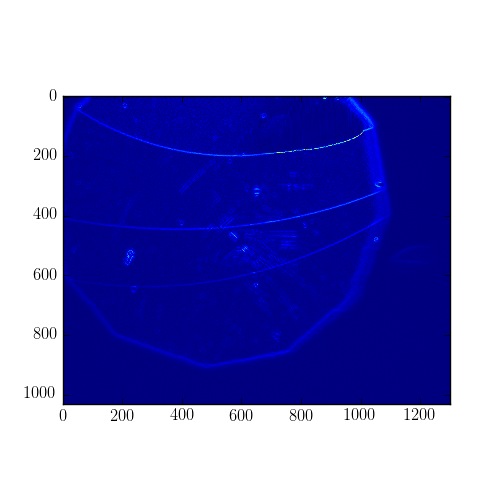

In [136]:
fig1,ax1 = plt.subplots(figsize=(5,5))
plt.imshow(filters.scharr(testimage/1000.))

In [6]:
from skimage.feature import canny

<IPython.core.display.Javascript object>


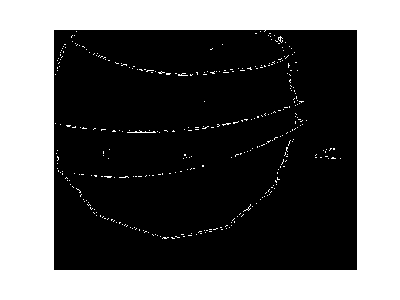

(-0.5, 1299.5, 1029.5, -0.5)

In [60]:
edges = canny(testimage/50.,sigma=20)

fig,ax = plt.subplots(figsize=(4,3))
ax.imshow(edges,cmap=plt.cm.gray, interpolation='nearest')
ax.axis('off')


In [34]:
hst = np.histogram(testimage, bins = np.arange(0,4096))

<IPython.core.display.Javascript object>


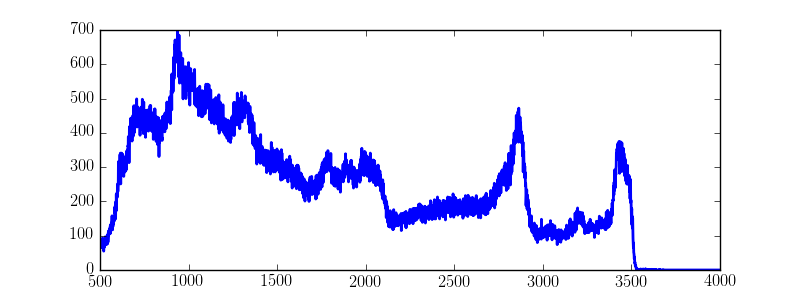

(0, 700)

In [97]:
fig, ax = plt.subplots(figsize=(8,3))
plt.plot(hst[1][:-1],hst[0],lw=2)
plt.xlim([500,4000])
plt.ylim([0,700])

In [75]:
img = filter.threshold_adaptive(testimage,50)

<IPython.core.display.Javascript object>


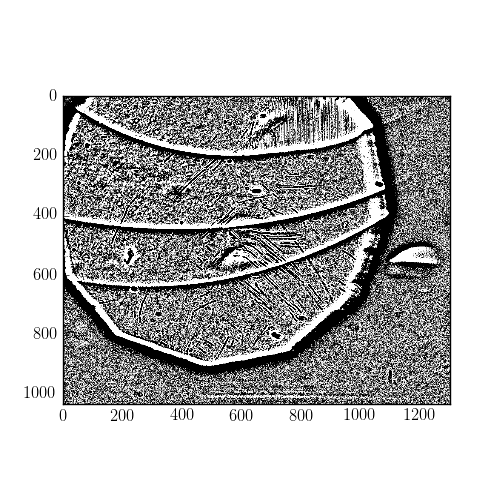

In [76]:
fig3,ax3 = plt.subplots(figsize=(5,5))
plt.imshow(img,cmap='gray')

<IPython.core.display.Javascript object>


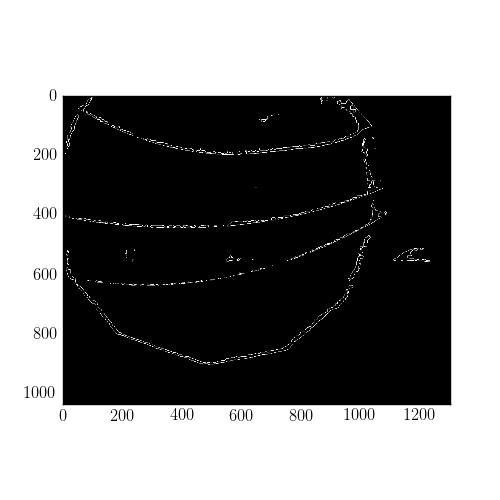

In [91]:
can = canny(img,sigma=1)
#fill = ndi.binary_fill_holes(img)
fig4,ax4 = plt.subplots(figsize=(5,5))
plt.imshow(can,cmap='gray')

<IPython.core.display.Javascript object>


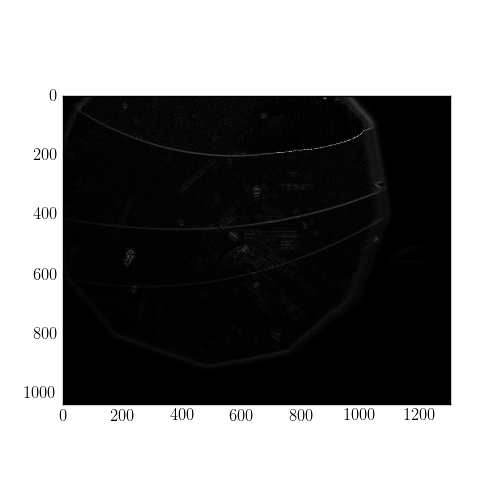

In [144]:
fill = filters.scharr(testimage)
fig4,ax4 = plt.subplots(figsize=(5,5))
plt.imshow(fill,cmap='gray')

<IPython.core.display.Javascript object>


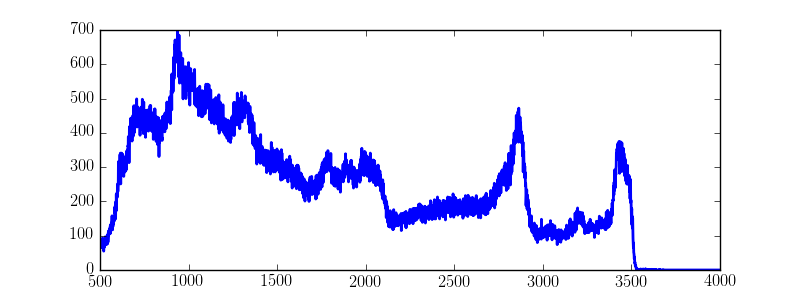

(0, 700)

In [98]:
fig, ax = plt.subplots(figsize=(8,3))
plt.plot(hst[1][:-1],hst[0],lw=2)
plt.xlim([500,4000])
plt.ylim([0,700])

<IPython.core.display.Javascript object>


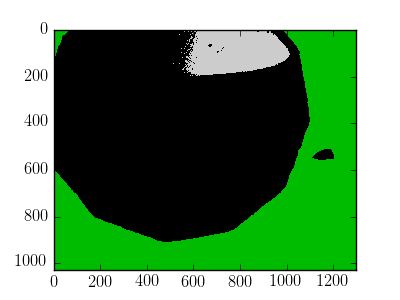

In [134]:
markers  = np.zeros_like(testimage)
markers[testimage<300]=1
markers[testimage>3100]=2

fig,ax = plt.subplots(figsize=(4,3))
ax.imshow(markers,cmap=plt.cm.spectral, interpolation='nearest')


<IPython.core.display.Javascript object>


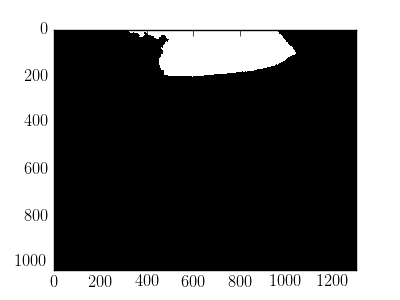

In [135]:
seg = skimage.morphology.watershed(filters.scharr(testimage/100.),markers)
fig,ax = plt.subplots(figsize=(4,3))
ax.imshow(seg,cmap=plt.cm.gray, interpolation='nearest')

<IPython.core.display.Javascript object>


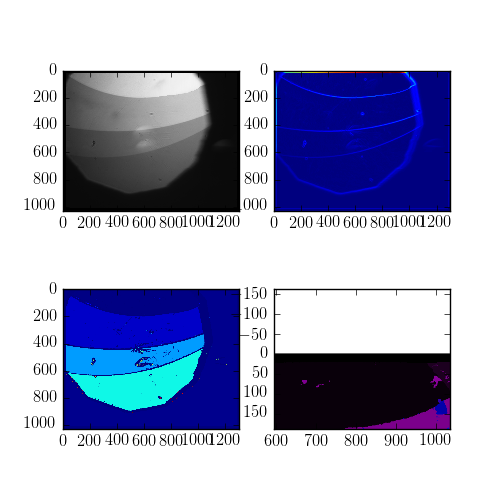

In [161]:
testwithedge =np.zeros([i for i in testimage.shape]).astype('uint8')
testwithedge = np.copy(testimage)
testwithedge[:,:20]=0
testwithedge[:,-20:]=0
testwithedge[:20,:]=0
testwithedge[-20:,:]=0
testwithedge[:,:5]=2**6
testwithedge[:,-5:]=2**6
testwithedge[:5,:]=2**6
testwithedge[-5:,:]=2**6



denoised = filters.rank.median(testwithedge,skimage.morphology.disk(5))

#markers =filters.scharr(testwithedge/4000.)<.04
markers = filters.rank.gradient(denoised,skimage.morphology.disk(1))<20
markers,reg = ndi.label(markers)

gradient = filters.rank.gradient(denoised, skimage.morphology.disk(4))
#gradient = filters.scharr(testwithedge/4000.)

labels = watershed(gradient,markers)

fig, ax = plt.subplots(nrows=2,ncols=2, figsize=(5,5))
axes = ax.ravel()
ax0,ax1,ax2,ax3=axes

ax0.imshow(testwithedge,cmap='gray')
ax1.imshow(gradient)
ax2.imshow(markers)
ax3.imshow(labels,cmap=plt.cm.spectral)

<IPython.core.display.Javascript object>


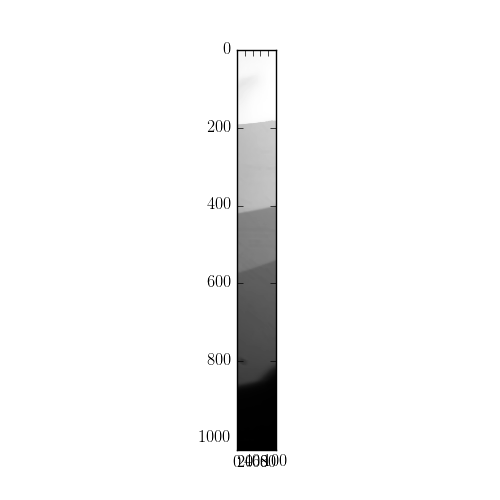

In [194]:
fig10,ax10 = plt.subplots(figsize=(5,5))
ax10.imshow(denoised[:,700:800],cmap='gray')

In [184]:
it = np.array([[1,2,3],[4,5,6]])

In [192]:
it[:,1]

array([2, 5])

In [15]:
[i+10 for i in testimage.shape]

[1040, 1310]

In [47]:
testwithedge

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [27]:
np.zeros([i+10 for i in testimage.shape]).shape

(1040, 1310)

In [57]:
testwithedge =np.zeros([i+10 for i in testimage.shape]).astype(int)
testwithedge[5:-5,5:-5] = np.copy(testimage)

In [58]:
testwithedge[5:7,5:7]

array([[170, 172],
       [172, 165]])

In [49]:
testimage

array([[170, 172, 170, ..., 146, 146, 144],
       [172, 165, 169, ..., 146, 146, 148],
       [169, 170, 173, ..., 147, 147, 149],
       ..., 
       [145, 149, 146, ..., 148, 147, 148],
       [148, 147, 145, ..., 145, 155, 145],
       [145, 147, 143, ..., 147, 148, 147]], dtype=uint16)

In [87]:
filters.scharr(testwithedge/4000.).max()

0.61429166863175888

In [114]:
labels_size = [((labels == i).nonzero())[0].shape[0] for i in np.arange(0,10)]

In [109]:
(labels==1).nonzero()[1].shape[0]

27828

In [115]:
largestregions = 

[0, 27828, 68225, 1230, 134632, 7, 2, 8, 4, 2]

In [178]:
regionlist=pd.DataFrame.transpose(pd.DataFrame({i.label: (i.area,i.mean_intensity,i.centroid) for i in regionprops(labels,testwithedge)}))
regionlist.columns=('area','mean','centriod')

In [179]:
regionlist.sort('area',ascending=False)[:5]

,area,mean,centriod
10,441332,192.4364,"(692.709239303, 869.610035076)"
49,263212,1956.455,"(287.7320031, 484.403507439)"
272,213373,1024.649,"(707.065617487, 572.827208691)"
207,167030,1379.123,"(507.43674789, 483.662204394)"
4,134632,2918.343,"(98.3792337631, 572.18504516)"


<IPython.core.display.Javascript object>


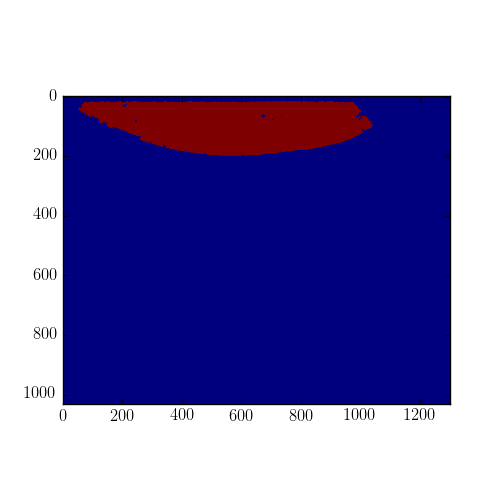

In [177]:
f,a = plt.subplots(figsize=(5,5))
a.imshow(labels==4)
#labels[labels==5]


In [156]:
(labels==1).nonzero()

(array([   0,    0,    0, ..., 1029, 1029, 1029]),
 array([   0,    1,    2, ..., 1297, 1298, 1299]))

In [157]:
labels

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ..., 
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int32)